[*********************100%***********************]  1 of 1 completed



--- Strategy Debug Output ---
Price            Close   Momentum  Volatility  Signal
Date                                                 
2025-06-13  595.240295  13.868958    0.006698       1
2025-06-16  600.903564  23.500549    0.008160       1
2025-06-17  595.768799   6.361206    0.008601       1
2025-06-18  595.679016   9.681396    0.008605       1
2025-06-20  594.280029   5.969238    0.008090       1
2025-06-23  600.150024  12.497253    0.007948       1
2025-06-24  606.780029  15.817078    0.008346       1
2025-06-25  607.119995  12.786987    0.006192       1
2025-06-26  611.869995  17.696533    0.005943       1
2025-06-27  614.909973  23.608032    0.004208       1
Signal counts:
 Signal
 1    53
-1    40
 0    30
Name: count, dtype: int64

--- Strategy Debug Output ---
Price            Close  Signal
Date                          
2025-06-13  595.240295       1
2025-06-16  600.903564       1
2025-06-17  595.768799       1
2025-06-18  595.679016       1
2025-06-20  594.280029      

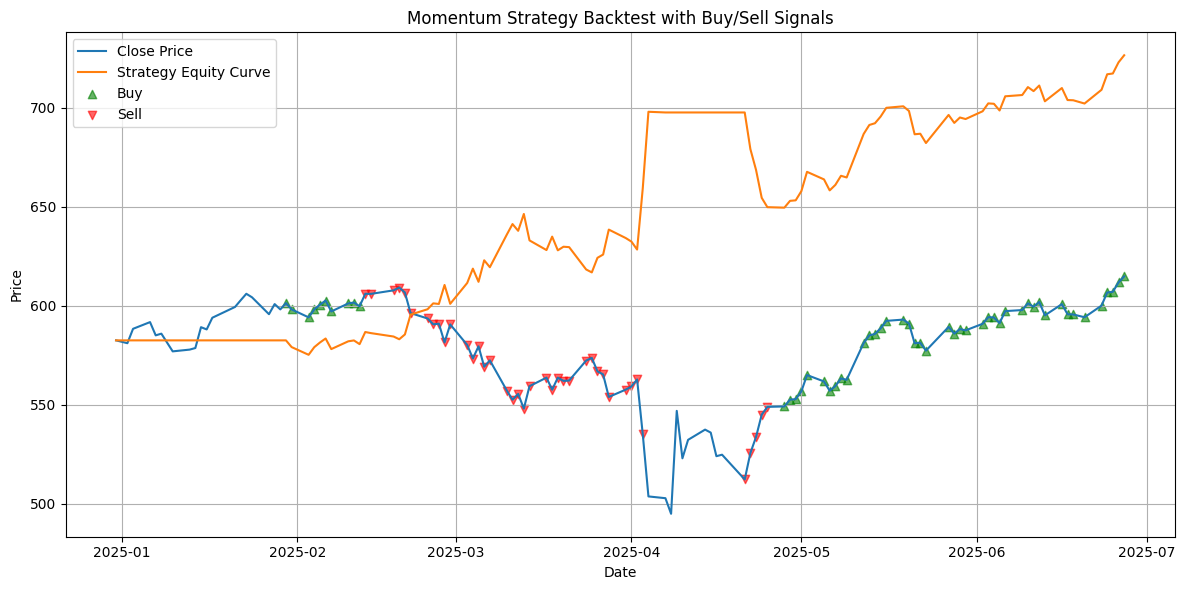

In [12]:
# Imports
import sys
import os
import importlib
import matplotlib.pyplot as plt
import pandas as pd

# Add parent directory to path so we can import modules from main project
sys.path.append(os.path.abspath(".."))

# Force reload of strategy module in case you're editing it live
import strategies.momentum as momentum
importlib.reload(momentum)

from backtest import run_backtest_with_metrics
from visuals import plot_backtest

# --- Tuning Parameters ---
window = 15
threshold = 0.01
min_hold = 5
vol_threshold = 0.02  # Max allowed volatility, None means disabled
vol_window = 10
transaction_cost = 0.0005  # 0.1% per trade

# --- Run Backtest ---
results, metrics = run_backtest_with_metrics(
    strategy=momentum.momentum_strategy,
    ticker="SPY",
    period="6mo",
    window=window,
    threshold=threshold,
    min_hold=min_hold,
    vol_threshold=vol_threshold,
    transaction_cost=transaction_cost
)

# --- Print Performance ---
print("Performance Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.2%}" if 'Return' in k or 'Drawdown' in k else f"{k}: {v:.2f}")

print("\nColumns in results:", results.columns)
print("Sample rows:\n", results.tail(5))

# --- Drop NaNs to prep for plotting ---
results = results.dropna(subset=["Cumulative Return"])

# --- Visualize Strategy ---
plot_backtest(results)

In [ ]:
import itertools
import numpy as np
from backtest import run_backtest_with_metrics
from strategies.momentum import momentum_strategy

# Define the search space
param_grid = {
    "window": [5, 10, 15],
    "threshold": [0.01, 0.02, 0.03],
    "min_hold": [1, 3, 5],
    "vol_threshold": [None, 0.02, 0.015],  # None disables filter
    "vol_window": [5, 10],
}

# Create all combinations
all_combinations = list(itertools.product(
    param_grid["window"],
    param_grid["threshold"],
    param_grid["min_hold"],
    param_grid["vol_threshold"],
    param_grid["vol_window"],
))

results = []

print(f"Evaluating {len(all_combinations)} parameter combinations...\n")

for i, (window, threshold, min_hold, vol_threshold, vol_window) in enumerate(all_combinations):
    try:
        df, metrics = run_backtest_with_metrics(
            strategy=momentum_strategy,
            ticker="TSLA",
            period="6mo",
            interval="1d",
            window=window,
            threshold=threshold,
            min_hold=min_hold,
            vol_threshold=vol_threshold,
            vol_window=vol_window,
            transaction_cost=0.0005,
        )

        results.append({
            "window": window,
            "threshold": threshold,
            "min_hold": min_hold,
            "vol_threshold": vol_threshold,
            "vol_window": vol_window,
            "sharpe": metrics["Sharpe Ratio"],
            "final_return": metrics["Final Return"],
            "max_drawdown": metrics["Max Drawdown"]
        })

        print(f"[{i+1}/{len(all_combinations)}] Done: window={window}, thr={threshold}, hold={min_hold}, vol_thr={vol_threshold}, vol_win={vol_window}, Sharpe={metrics['Sharpe Ratio']:.2f}")
    except Exception as e:
        print(f"[{i+1}] Failed: {e}")

# Sort results by Sharpe Ratio
results_sorted = sorted(results, key=lambda x: x["sharpe"], reverse=True)

# Display top 5 configs
print("\nTop 5 Configurations by Sharpe Ratio:")
for r in results_sorted[:5]:
    print(r)

In [11]:
import sys
import os

# Add project root to path
project_root = os.path.abspath("..") if "notebooks" in os.getcwd() else os.getcwd()
if project_root not in sys.path:
    sys.path.append(project_root)

from backtest import run_backtest_with_metrics
from strategies.momentum import momentum_strategy

df, metrics = run_backtest_with_metrics(
    strategy=momentum_strategy,
    ticker="MSFT",
    period="6mo",
    interval="1d",
    window=5,
    threshold=0.02,
    min_hold=1,
    vol_threshold=None,
    vol_window=5,
    transaction_cost=0.0005
)

print(metrics)

[*********************100%***********************]  1 of 1 completed


--- Strategy Debug Output ---
Price            Close   Momentum  Volatility  Signal
Date                                                 
2025-06-13  474.959991   4.579987    0.008301       1
2025-06-16  479.140015   6.390015    0.008804       1
2025-06-17  478.040009   7.119995    0.008533       1
2025-06-18  480.239990   7.619995    0.008561       1
2025-06-20  477.399994  -1.470001    0.007138      -1
2025-06-23  486.000000  11.040009    0.009430       1
2025-06-24  490.109985  10.969971    0.009393       1
2025-06-25  492.269989  14.229980    0.008613       1
2025-06-26  497.450012  17.210022    0.008793       1
2025-06-27  495.940002  18.540009    0.007762       1
Signal counts:
 Signal
 1    72
-1    44
 0     7
Name: count, dtype: int64

--- Strategy Debug Output ---
Price            Close  Signal
Date                          
2025-06-13  474.959991       1
2025-06-16  479.140015       1
2025-06-17  478.040009       1
2025-06-18  480.239990       1
2025-06-20  477.399994      

[*********************100%***********************]  1 of 1 completed


--- Strategy Debug Output ---
Price            Close   Momentum  Volatility  Signal
Date                                                 
2025-06-13  595.240295  13.868958    0.006308       1
2025-06-16  600.903564  23.500549    0.006710       1
2025-06-17  595.768799   6.361206    0.007254       1
2025-06-18  595.679016   9.681396    0.007253       1
2025-06-20  594.280029   5.969238    0.007100       1
2025-06-23  600.150024  12.497253    0.007041       1
2025-06-24  606.780029  15.817078    0.007798       1
2025-06-25  607.119995  12.786987    0.007660       1
2025-06-26  611.869995  17.696533    0.007808       1
2025-06-27  614.909973  23.608032    0.007841       1
Signal counts:
 Signal
 1    53
 0    35
-1    35
Name: count, dtype: int64

--- Strategy Debug Output ---
Price            Close  Signal
Date                          
2025-06-13  595.240295       1
2025-06-16  600.903564       1
2025-06-17  595.768799       1
2025-06-18  595.679016       1
2025-06-20  594.280029      

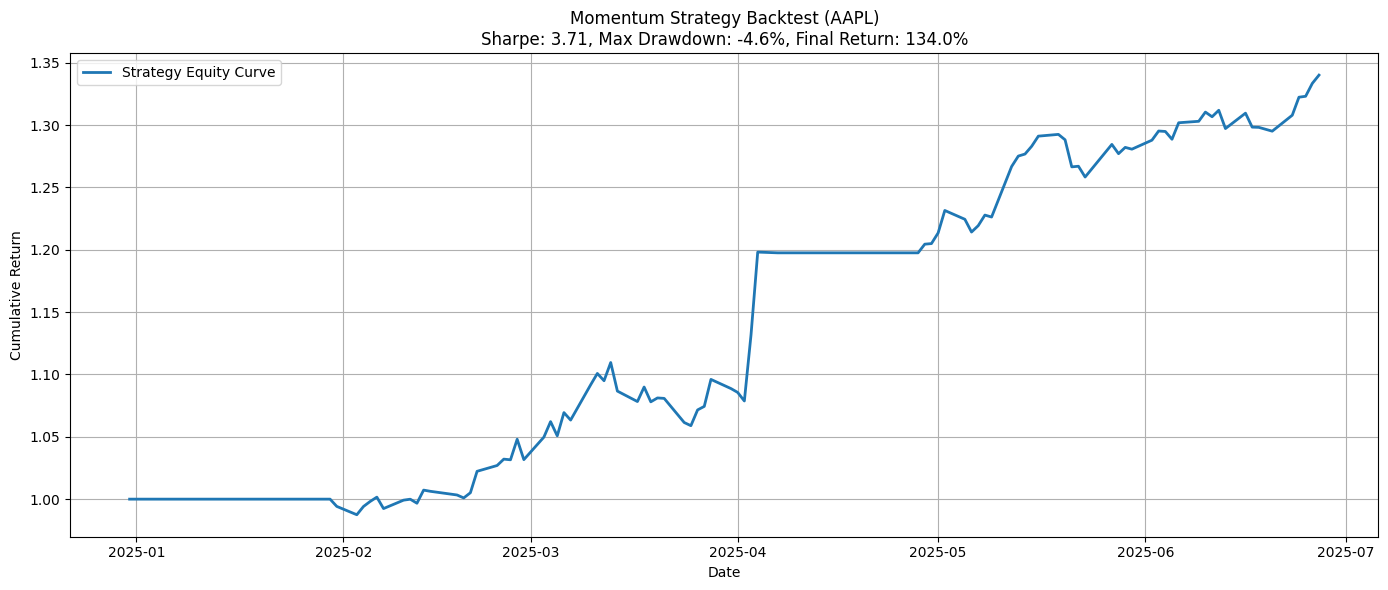

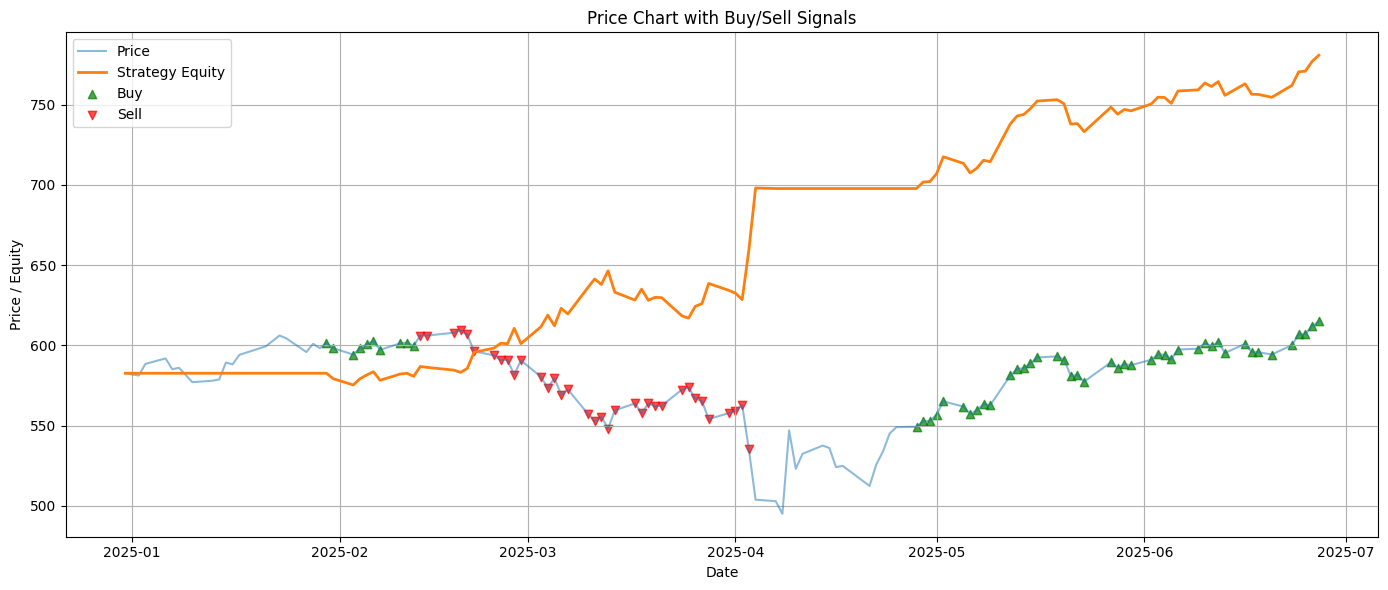

In [13]:
# --- Best Hyperparameters from Tuning ---
best_params = {
    "window": 15,
    "threshold": 0.01,
    "min_hold": 5,
    "vol_window": 10,
    "vol_threshold": 0.02,
    "transaction_cost": 0.0005
}

from backtest import run_backtest_with_metrics
from strategies.momentum import momentum_strategy

results, metrics = run_backtest_with_metrics(
    strategy=momentum_strategy,
    ticker="SPY",
    period="6mo",
    interval="1d",
    **best_params
)

print("Performance Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.2%}" if 'Return' in k or 'Drawdown' in k else f"{k}: {v:.2f}")

import matplotlib.pyplot as plt

# Drop rows with NaNs in Cumulative Return
results = results.dropna(subset=["Cumulative Return"])

# Plot Setup
plt.figure(figsize=(14, 6))
plt.plot(results.index, results["Cumulative Return"], label="Strategy Equity Curve", linewidth=2)

# Title and metrics
plt.title(f"Momentum Strategy Backtest (AAPL)\n"
          f"Sharpe: {metrics['Sharpe Ratio']:.2f}, "
          f"Max Drawdown: {metrics['Max Drawdown']:.1%}, "
          f"Final Return: {metrics['Final Return']:.1%}")

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

buy_signals = results[results["Signal"] == 1]
sell_signals = results[results["Signal"] == -1]

plt.figure(figsize=(14, 6))
plt.plot(results.index, results["Close"], label="Price", alpha=0.5)
plt.plot(results.index, results["Cumulative Return"] * results["Close"].iloc[0], label="Strategy Equity", linewidth=2)

plt.scatter(buy_signals.index, buy_signals["Close"], marker="^", color="green", label="Buy", alpha=0.7)
plt.scatter(sell_signals.index, sell_signals["Close"], marker="v", color="red", label="Sell", alpha=0.7)

plt.title("Price Chart with Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price / Equity")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()